# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import Data

In [3]:
# membuat data frame untuk membaca data
df = pd.read_csv("dataset/bank-full.csv", sep=";")

**Keterangan**<br>
Penambahan parameter sep=";" dilakukan karena file bank-full.csv mempunyai tipe comma delimited

In [4]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


# Data Understanding

In [5]:
# mengecek struktur df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# melihat jumlah baris dan kolom
df.shape

(45211, 17)

In [7]:
# mendeskripsi numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
# melihat unique values pada setiap kolom
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


# Data Preprocessing

## Mengganti Nama Kolom

In [9]:
# menggati nama dari kolom menjadi deposit
df_2 = df.rename(columns={"y":"deposit"})
# cek df_2 kolom
df_2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

**Keterangan**<br>
Kolom y sudah berubah menjadi deposit, penggantian nama ini dilakukan agar mempermudah dalam memahami data frame

## Cek Nilai Null

In [10]:
# mencari missing values
df_2.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

**Keterangan**<br>
Tidak ada missing values

## Cek One Unique Value

In [11]:
# mencari kolom dengan one unique value
for column in df_2.columns:
    print(column,df_2[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
deposit 2


**Keterangan**<br>
Tidak ada kolom yang memiliki one unique value

## Explorarasi Categorical Features

In [12]:
# mengeksplorasi Categorical Features
categorical_features = [feature for feature in df_2.columns if ((df_2[feature].dtypes=="O") & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [13]:
for feature in categorical_features:
    print(f"Feature {feature} memiliki unique value {(df_2[feature].nunique())}")

Feature job memiliki unique value 12
Feature marital memiliki unique value 3
Feature education memiliki unique value 4
Feature default memiliki unique value 2
Feature housing memiliki unique value 2
Feature loan memiliki unique value 2
Feature contact memiliki unique value 3
Feature month memiliki unique value 12
Feature poutcome memiliki unique value 4


**Keterangan**
* Terdapat 9 Categorical Features
* Feature job dan month memiliki jumlah kategori tertinggi

### Data Visualization

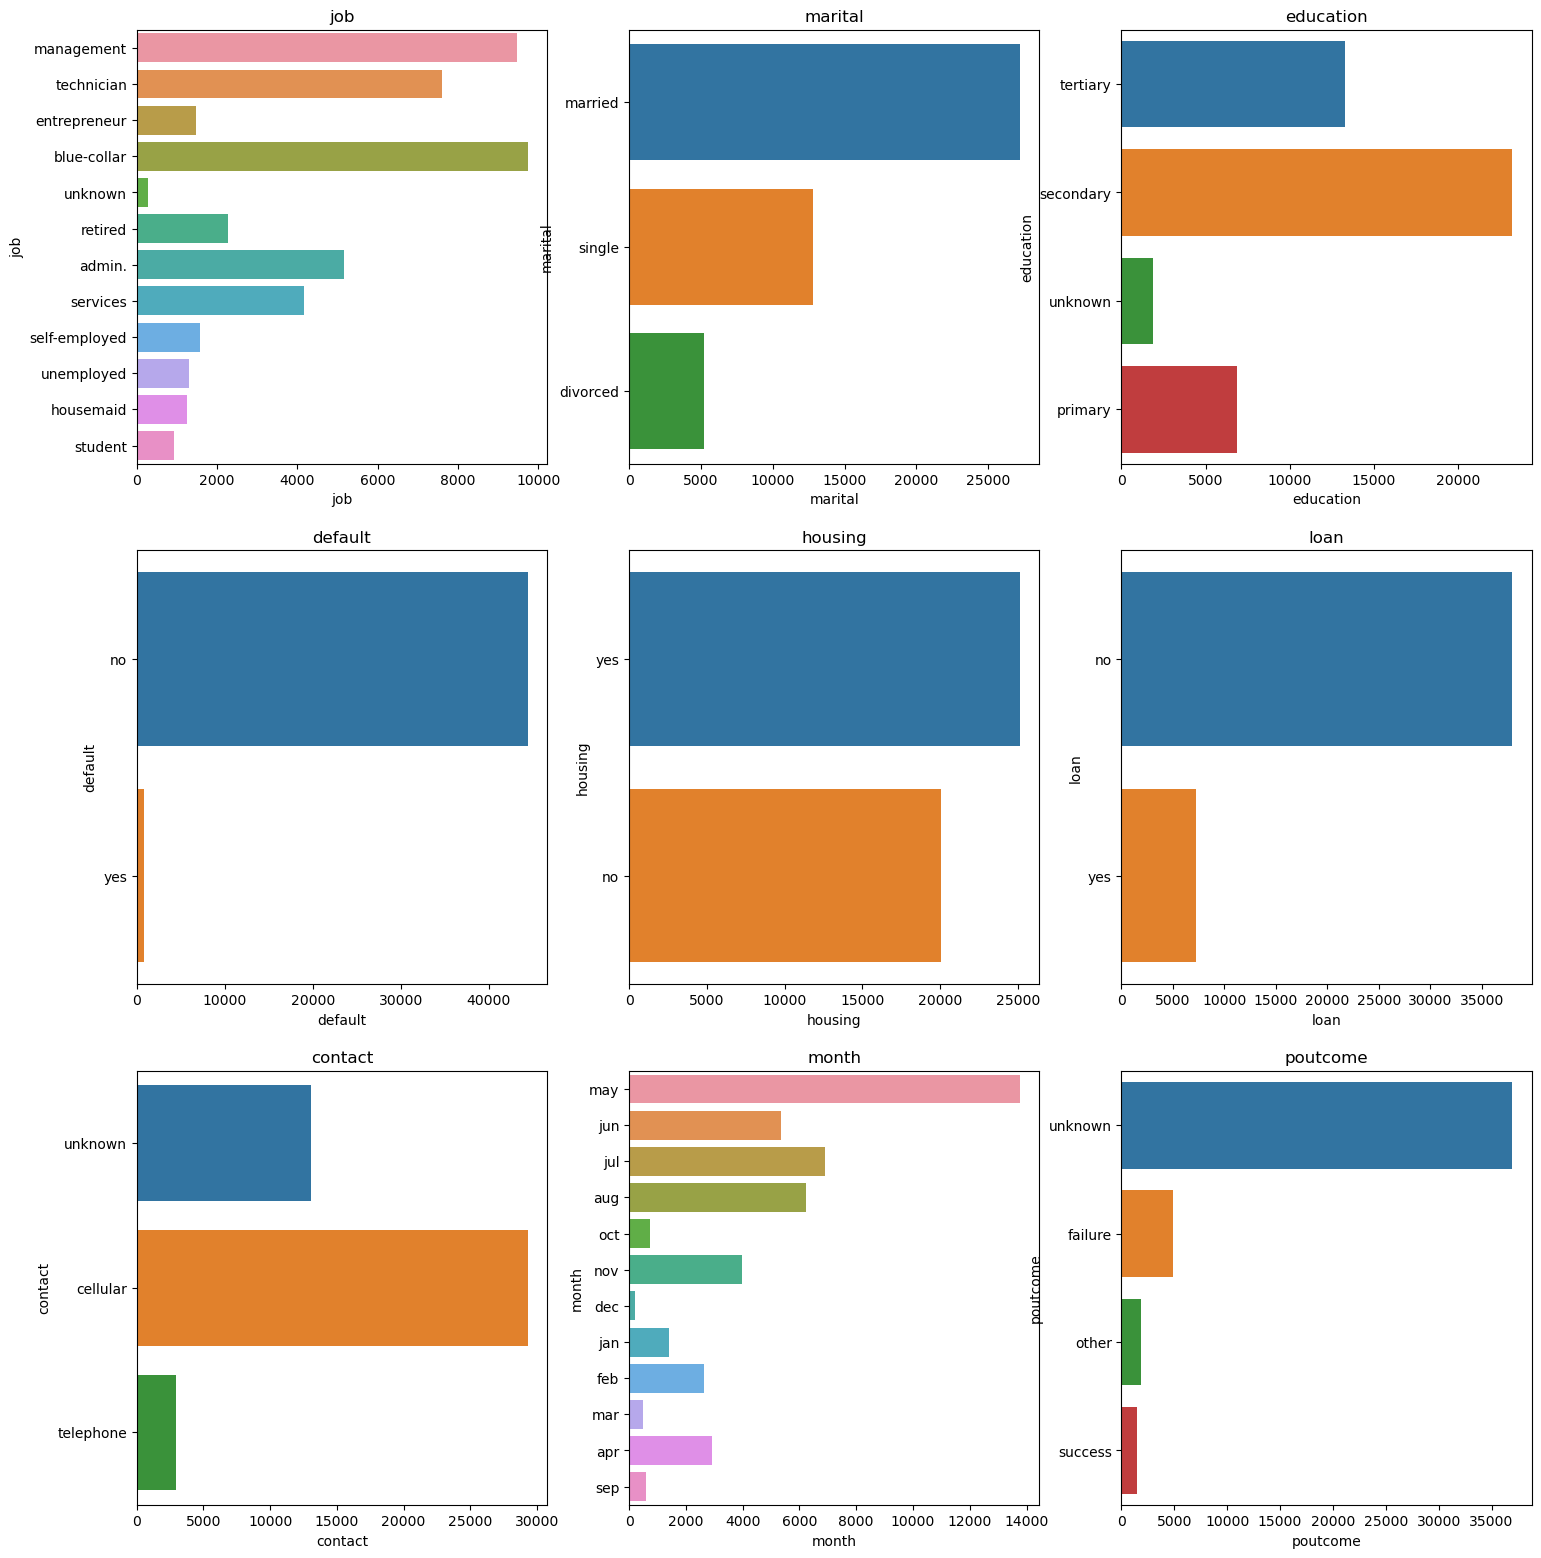

In [14]:
# mengetahui distribusi Categorical Features
plt.figure(figsize=(18,80), facecolor="white")
plotnumb = 1
for cat in categorical_features:
    ax = plt.subplot(12,3, plotnumb)
    sns.countplot(y=cat, data=df_2)
    plt.xlabel(cat)
    plt.title(cat)
    plotnumb += 1
plt.show()

**Ketereangan**<br>
* Client dengan job blue-collar memiliki records tertinggi dan Client dengan job student memiliki records terendah
* Client yang sudah menikah memiliki records tertinggi dan Client yang cerai memiliki records terendah
* Client yang memiliki latar belakang edukasi secondary memiliki records tertinggi dan Client yang memiliki latar belakang edukasi primary memiliki records terendah
* Record yes dan no pada feature default memiliki jarak rasio yang sangat jauh, sehingga feature ini tidak begitu penting dan bisa dihapus
* Client yang terakhir dihubungi pada bulan may memiliki records tertinggi dan Client yang terakhir dihubungi pada bulan dec memiliki records terendah

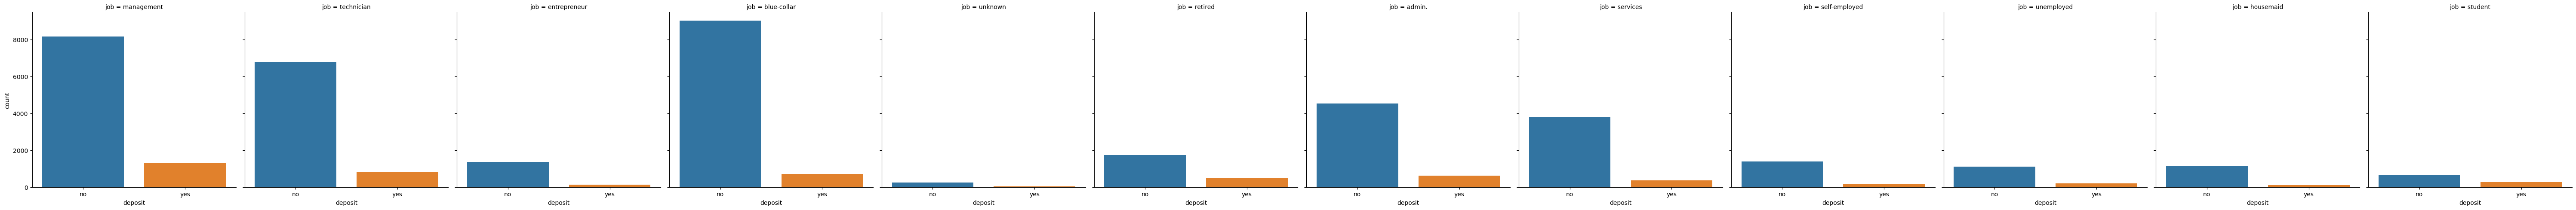

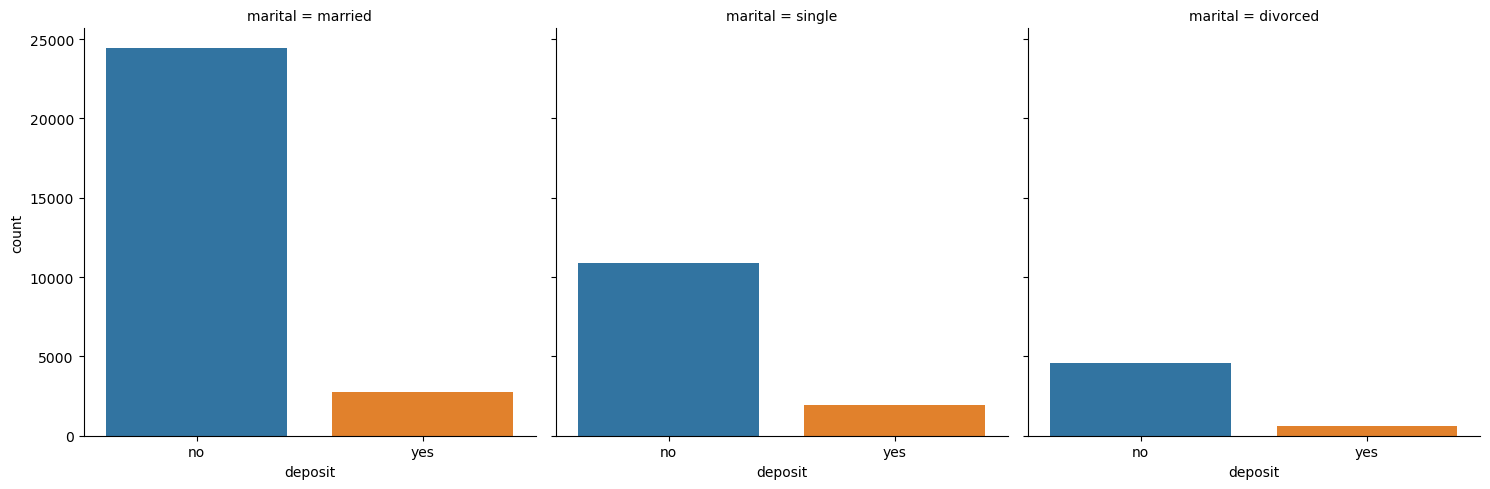

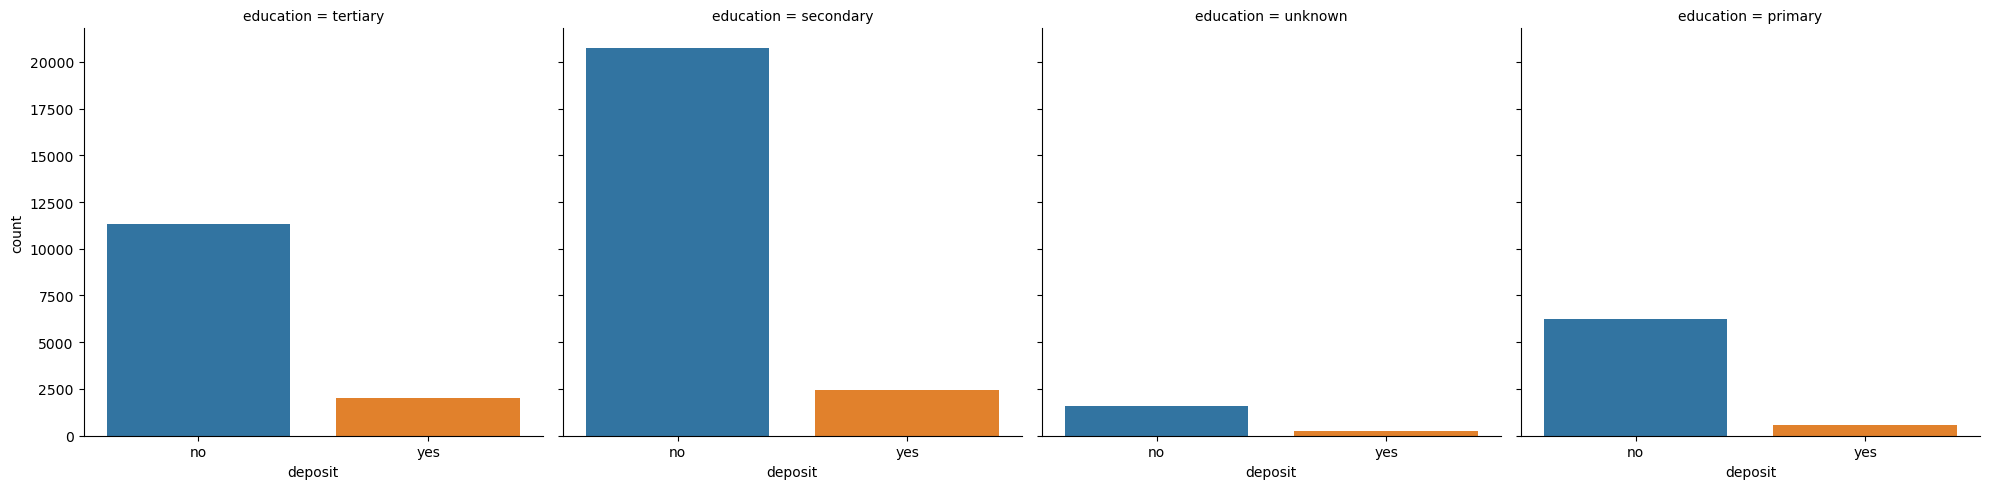

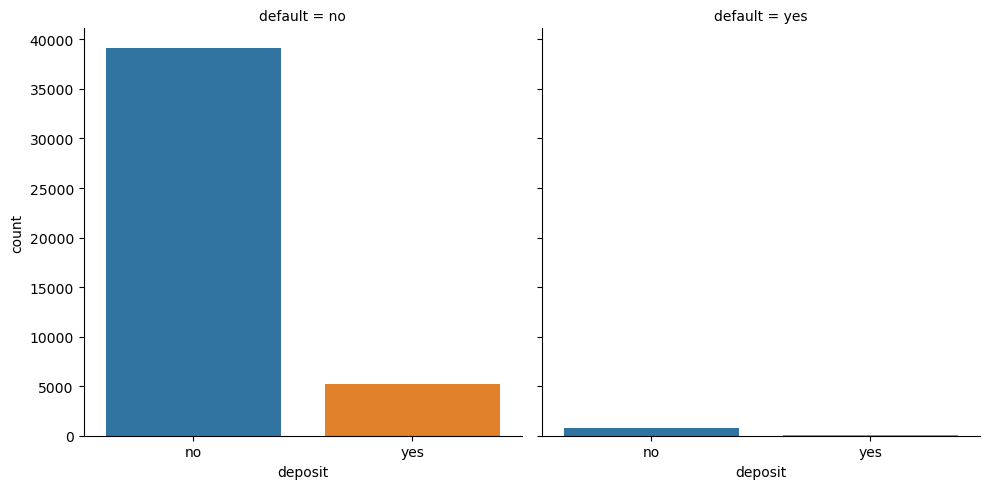

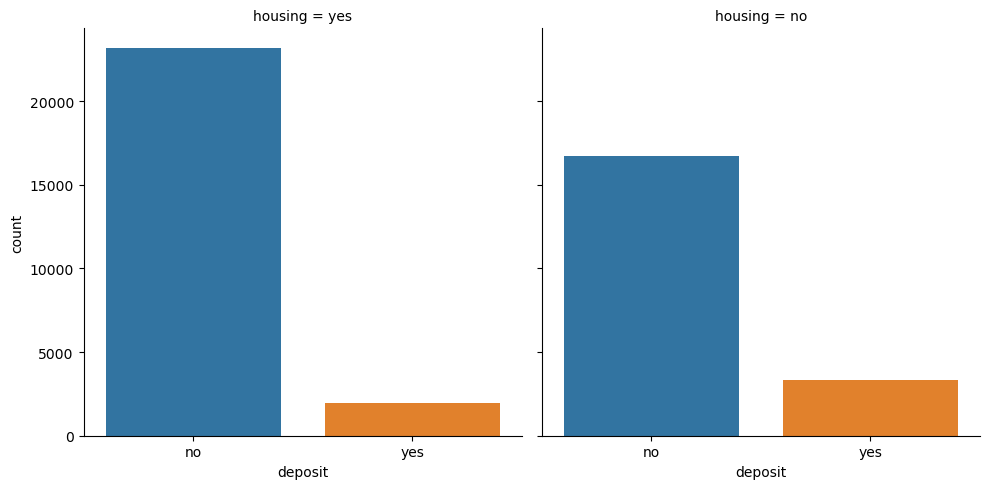

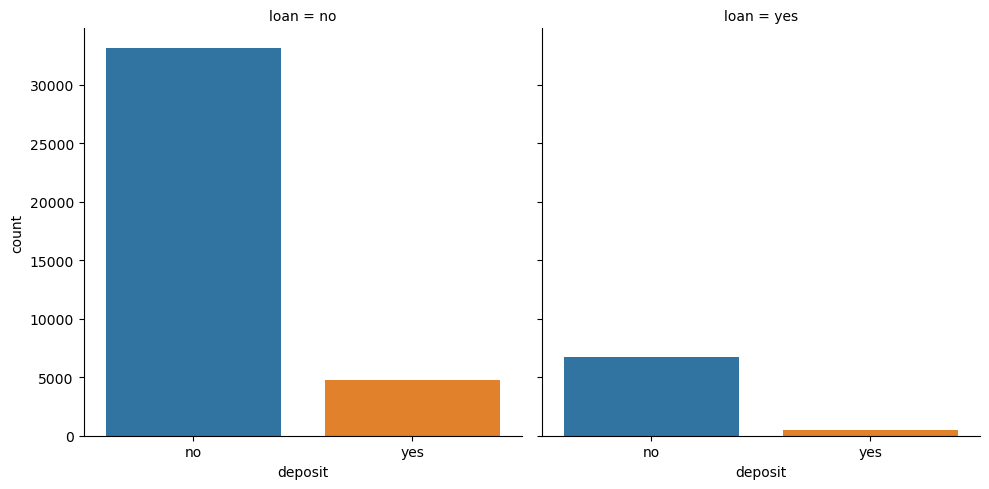

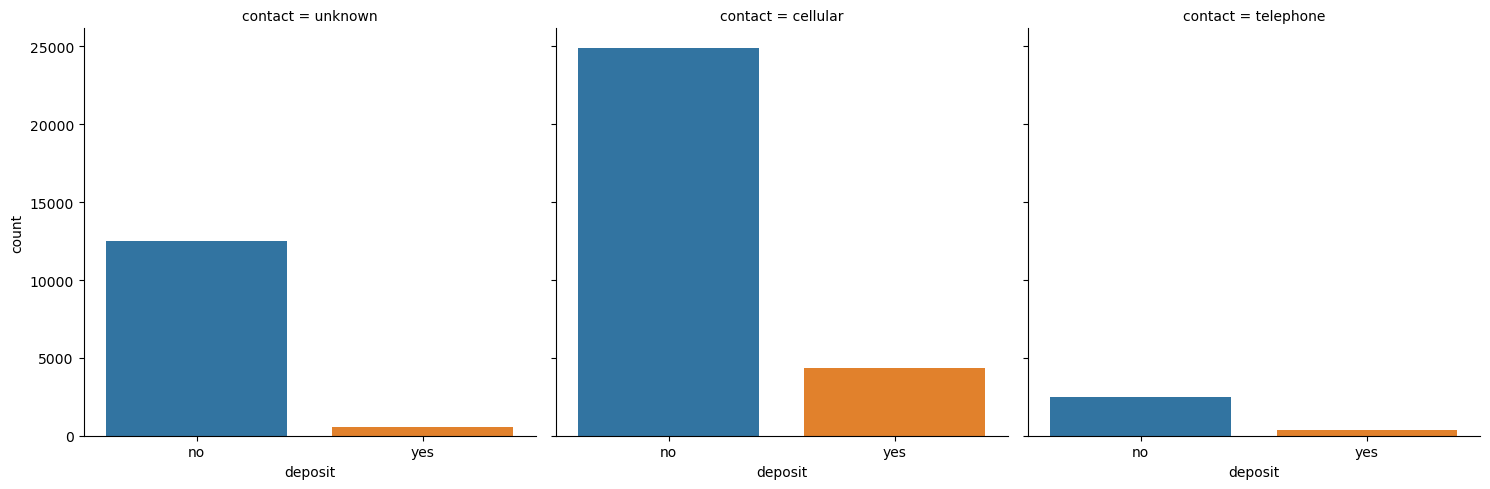

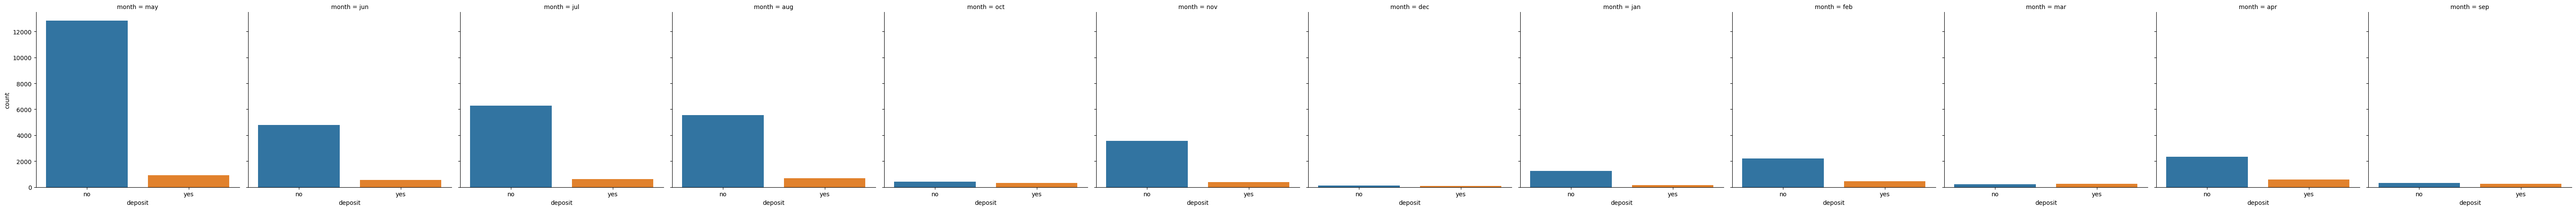

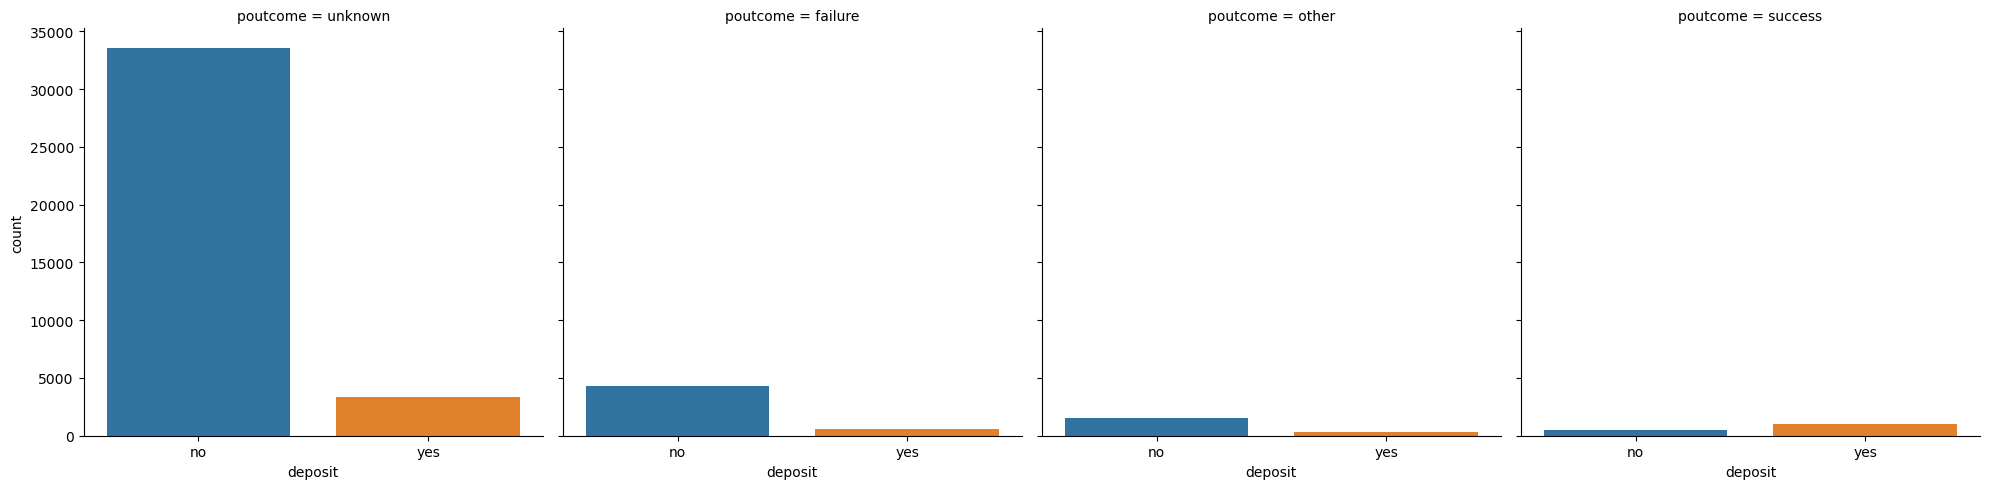

In [15]:
# mencari relasi antara Categorical Features dengan label/target
for cat in categorical_features:
    sns.catplot(x='deposit', col=cat, kind='count', data=df_2)
plt.show()

In [16]:
# mengelompokan data berdasarkan deposit dan Categorical Features dan mencari jumlahnya
for cat in categorical_features:
    print(df_2.groupby(['deposit', cat]).size())

deposit  job          
no       admin.           4540
         blue-collar      9024
         entrepreneur     1364
         housemaid        1131
         management       8157
         retired          1748
         self-employed    1392
         services         3785
         student           669
         technician       6757
         unemployed       1101
         unknown           254
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     4585
         married     24459
         single      10878
yes      divorced      622
         married      2755
         single       1912
dtype: int64
deposit  education
no      

**Keterangan**
* Client dengan poutcome (nilai luaran dari kampanye pemasaran sebelumnya) succes memiliki ketertarikan untuk depost

## Explorasi Numerical Feature

In [17]:
# mengeksplorasi Numerical Feature
numerical_features = [feature for feature in df_2.columns if ((df_2[feature].dtypes!="O") & (feature not in ['deposit']))]
print(numerical_features)
print(f"Terdapat {len(numerical_features)} Numerical Features")

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Terdapat 7 Numerical Features


### Menemukan Discrete  Numerical Feature

In [18]:
discrete_feature = [feature for feature in numerical_features if df_2[feature].nunique()<25]
print(discrete_feature)
print(f"Terdapat {len(discrete_feature)} Discrete Numerical Features")

[]
Terdapat 0 Discrete Numerical Features


### Menemukan Continuous  Numerical Feature

In [19]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print (continuous_features)
print(f"Terdapat {len(continuous_features)} Continuous Feature")

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Terdapat 7 Continuous Feature


### Data Visualization

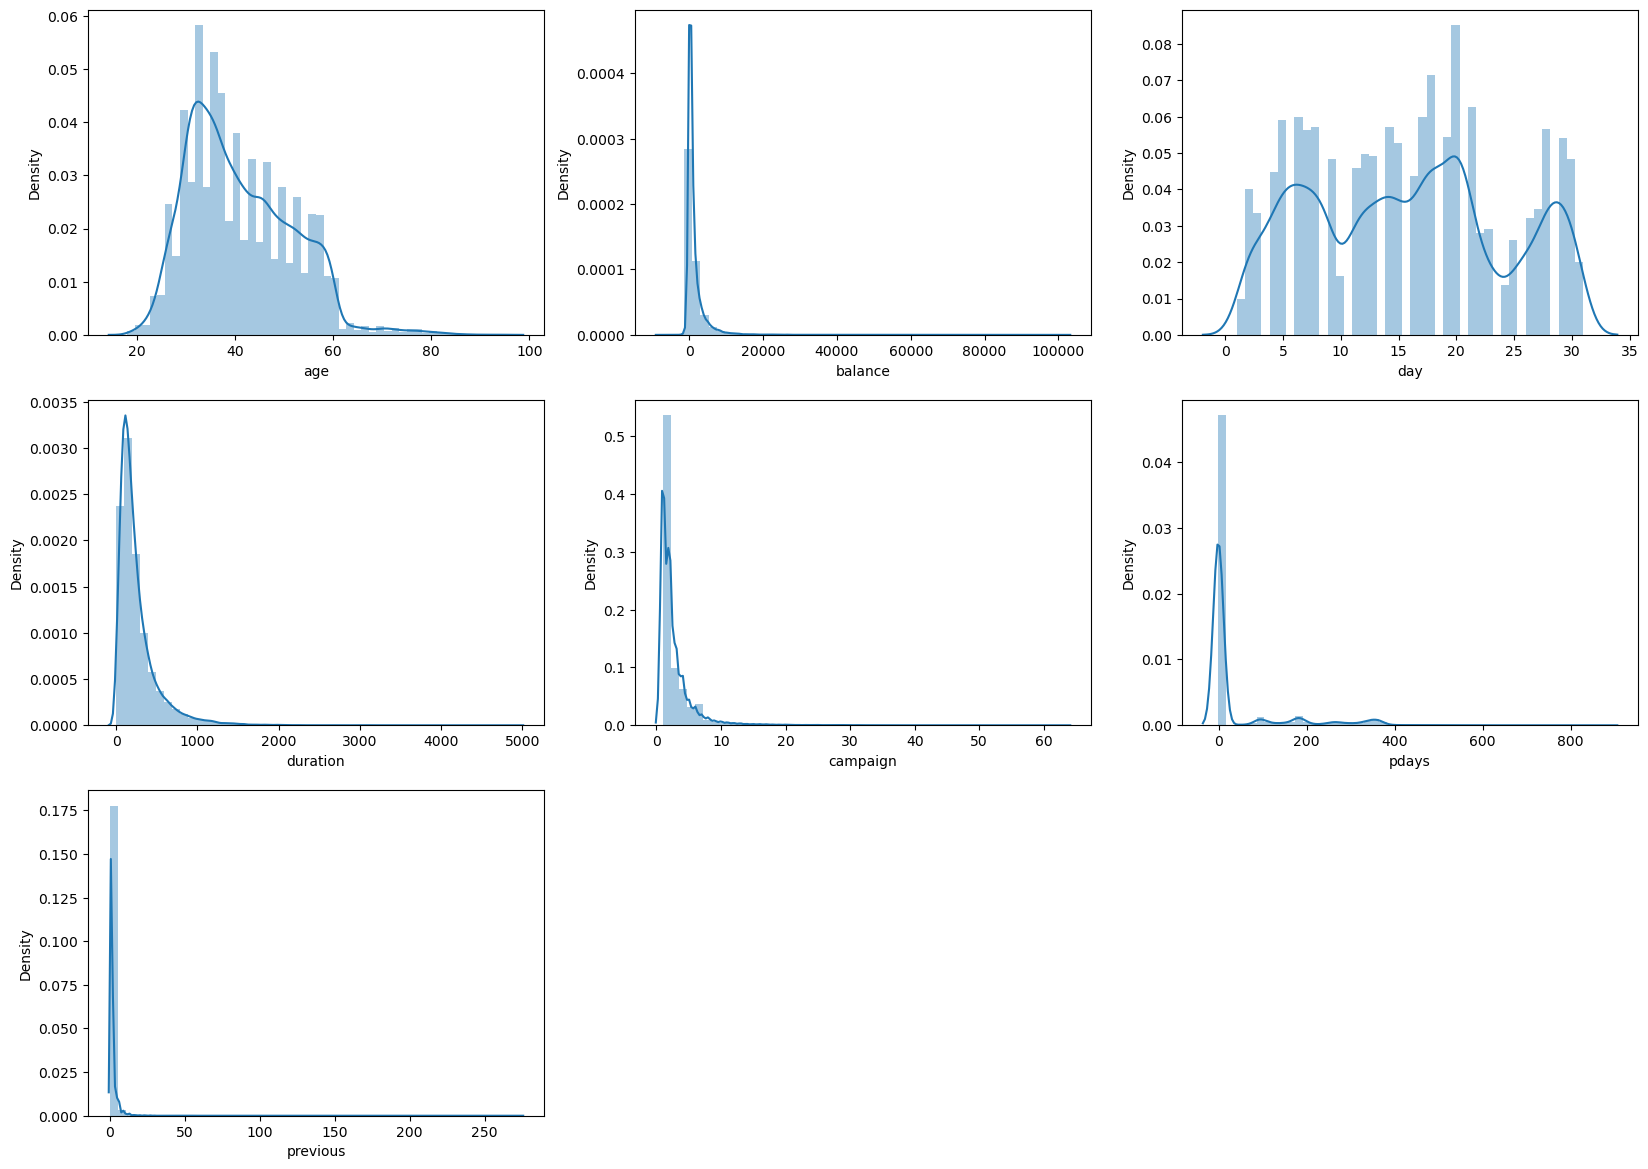

In [20]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df_2[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber += 1
plt.show()

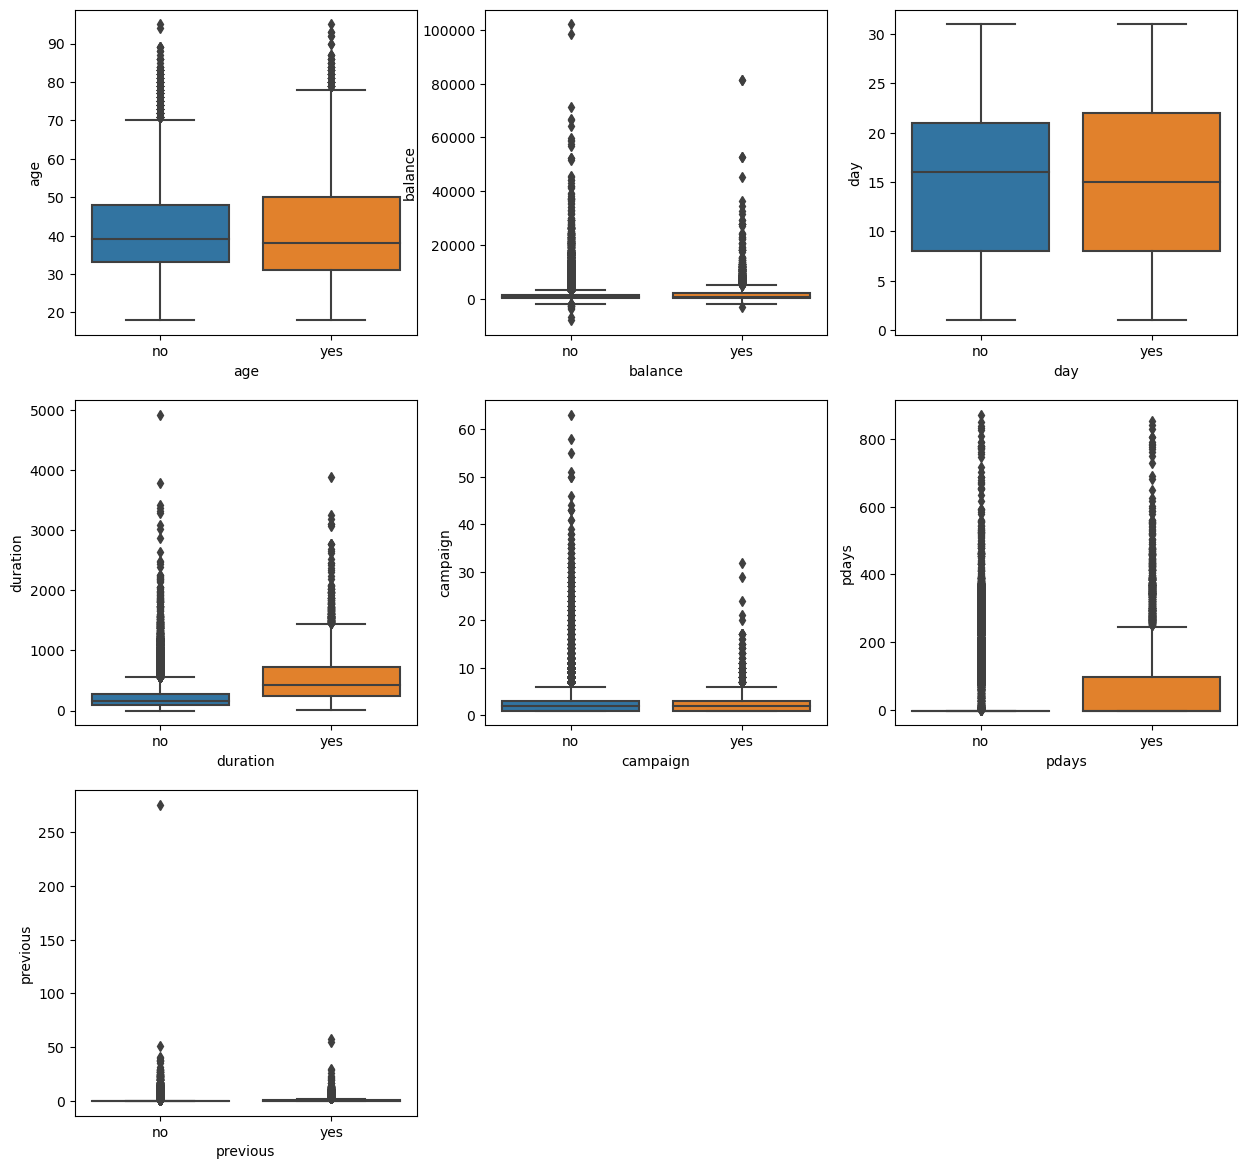

In [21]:
plt.figure(figsize=(15,60), facecolor='white')
num = 1
for cont in continuous_features:
    ax = plt.subplot(12,3,num)
    sns.boxplot(x='deposit', y=df_2[cont], data=df_2)
    plt.xlabel(cont)
    num += 1
plt.show()

**Keterangan**
* Client dengan duration diskusi yang lama lebih tertarik untuk deposit

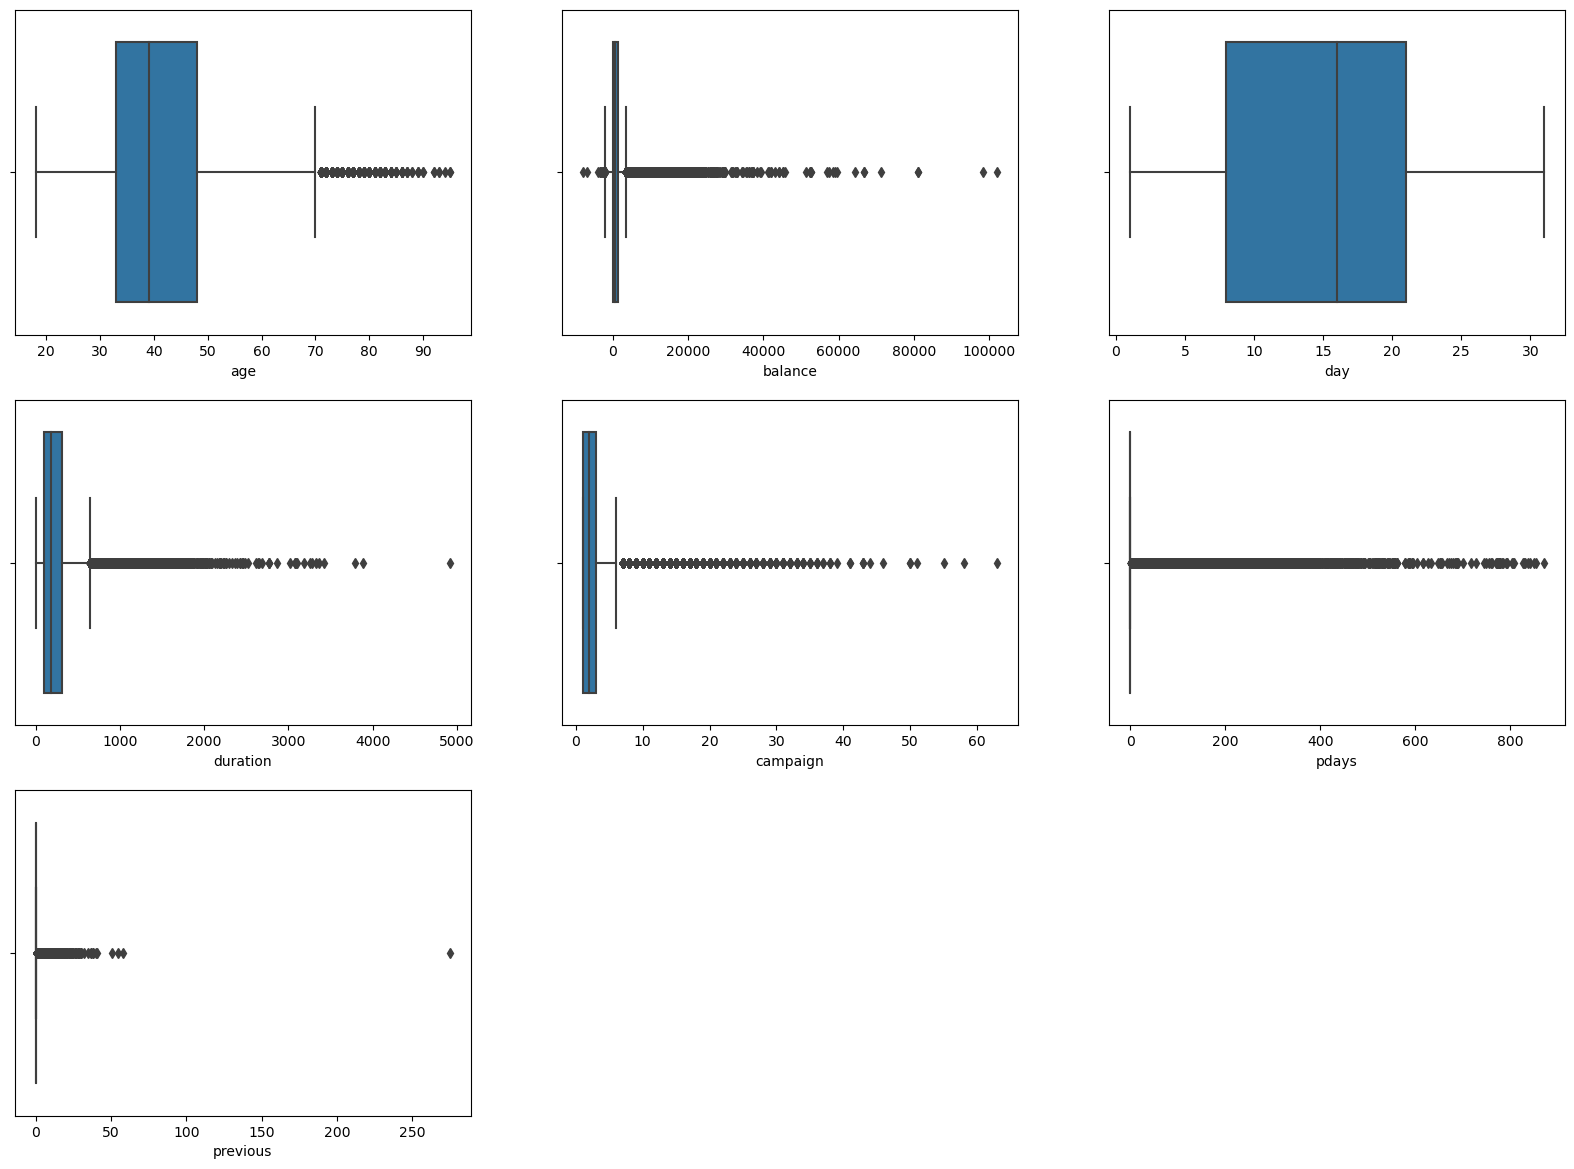

In [22]:
plt.figure(figsize=(20,60), facecolor='white')
num = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,num)
    sns.boxplot(df_2[numerical_feature])
    plt.xlabel(numerical_feature)
    num += 1
plt.show()

**Keterangan**
* feature age, balance, duration, campaign, pdays, dan previous memiliki beberapa outliers

### Cek Korelasi

<AxesSubplot:>

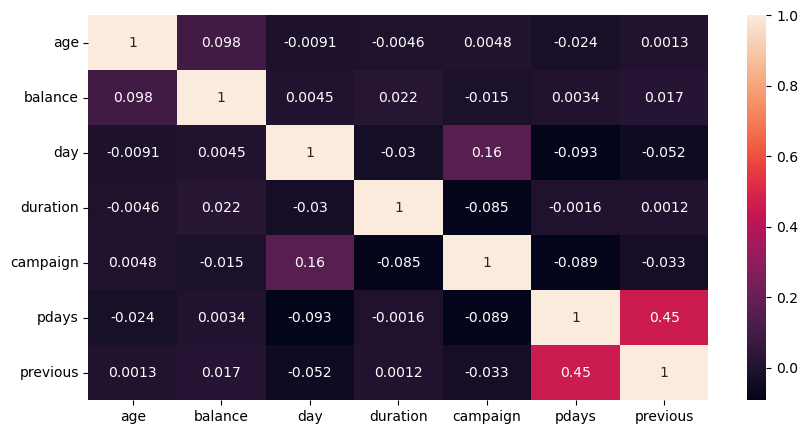

In [23]:
## cek korelasi
corr_mat = df_2.corr()
fig = plt.figure(figsize=(10,5))
sns.heatmap(corr_mat, annot=True)

**Keterangan**
* Tidak ada feature yang sangat berkorelasi terhadap feature lain

## Cek Data Balance atau Tidak

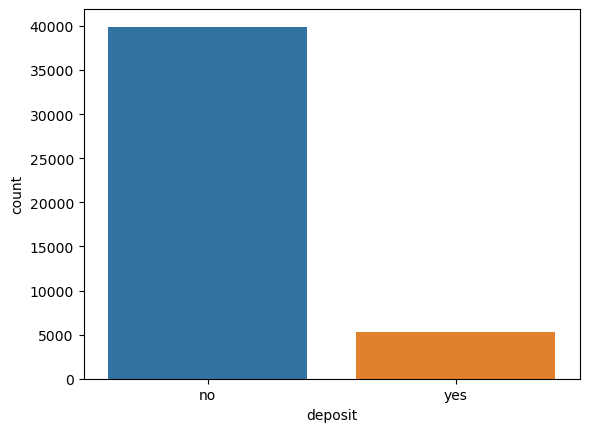

In [24]:
sns.countplot(x='deposit', data=df_2)
plt.show()

In [25]:
df_2['deposit'].groupby(df_2['deposit']).count()

deposit
no     39922
yes     5289
Name: deposit, dtype: int64

**Keterangan**
* Data diatas terlihat kurang balance 

In [26]:
# menghapus kolom default dan menghapus dari categorical_features
df_2.drop('default', axis=1, inplace=True)
categorical_features.remove('default')
categorical_features

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

# Classification

In [27]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

In [28]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   loan       45211 non-null  object
 7   contact    45211 non-null  object
 8   day        45211 non-null  int64 
 9   month      45211 non-null  object
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  deposit    45211 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


## Standarisasi Data

In [29]:
from sklearn.preprocessing import StandardScaler

# melakukan standarisasi data yang memiliki tiped data int/numerical feature
scaler = StandardScaler()
df_2[numerical_features] = scaler.fit_transform(df_2[numerical_features])

In [30]:
df_2.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.606965,management,married,tertiary,0.256419,yes,no,unknown,-1.298476,may,0.011016,-0.569351,-0.411453,-0.25194,unknown,no
1,0.288529,technician,single,secondary,-0.437895,yes,no,unknown,-1.298476,may,-0.416127,-0.569351,-0.411453,-0.25194,unknown,no
2,-0.747384,entrepreneur,married,secondary,-0.446762,yes,yes,unknown,-1.298476,may,-0.707361,-0.569351,-0.411453,-0.25194,unknown,no
3,0.571051,blue-collar,married,unknown,0.047205,yes,no,unknown,-1.298476,may,-0.645231,-0.569351,-0.411453,-0.25194,unknown,no
4,-0.747384,unknown,single,unknown,-0.447091,no,no,unknown,-1.298476,may,-0.233620,-0.569351,-0.411453,-0.25194,unknown,no


In [31]:
#Encode data yang bertipe data object/categorical features menggunakan get_dummies()
df_encoded = pd.get_dummies(df_2,columns=(categorical_features))
df_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.25194,no,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194,no,0,0,...,0,0,1,0,0,0,0,0,0,1
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194,no,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194,no,0,1,...,0,0,1,0,0,0,0,0,0,1
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194,no,0,0,...,0,0,1,0,0,0,0,0,0,1


In [32]:
# mengganti data deposit dari yes dan no menjadi 1 dan 0
df_encoded['deposit'] = df_encoded['deposit'].map({'yes': 1, 'no': 0})

In [33]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  float64
 1   balance              45211 non-null  float64
 2   day                  45211 non-null  float64
 3   duration             45211 non-null  float64
 4   campaign             45211 non-null  float64
 5   pdays                45211 non-null  float64
 6   previous             45211 non-null  float64
 7   deposit              45211 non-null  int64  
 8   job_admin.           45211 non-null  uint8  
 9   job_blue-collar      45211 non-null  uint8  
 10  job_entrepreneur     45211 non-null  uint8  
 11  job_housemaid        45211 non-null  uint8  
 12  job_management       45211 non-null  uint8  
 13  job_retired          45211 non-null  uint8  
 14  job_self-employed    45211 non-null  uint8  
 15  job_services         45211 non-null 

## Split Data Training set dan Testing set

In [34]:
from sklearn.model_selection import train_test_split

# Split dataset menjadi Training set dan Testing set
X = df_encoded.drop(['deposit'], axis=1)
y = df_encoded['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("Shape Training Feature:", X_train.shape)
print("Shape Testing Feature:", X_test.shape)
print("Shape Training Target:", y_train.shape[0])
print("Shape Testing Target:", y_test.shape[0])

Shape Training Feature: (31647, 49)
Shape Testing Feature: (13564, 49)
Shape Training Target: 31647
Shape Testing Target: 13564


## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear', random_state=0)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

acc_log_reg = metrics.accuracy_score(y_test, y_pred)
mat_log_reg=confusion_matrix(y_test, y_pred)

Accuracy model Logistic Regression : 0.9024624004718372


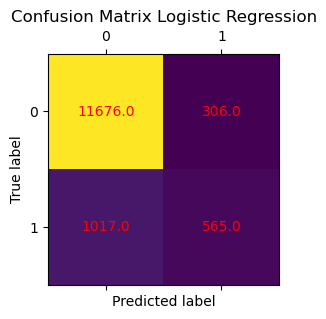

In [36]:
print(f"Accuracy model Logistic Regression : {acc_log_reg}")
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(mat_log_reg)

for (i, j), z in np.ndenumerate(mat_log_reg):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center', color='red')


plt.title("Confusion Matrix Logistic Regression")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

## K-Nearest Neighbors

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc_knn = metrics.accuracy_score(y_test, y_pred)
mat_knn=confusion_matrix(y_test, y_pred)

Accuracy model K-Nearest Neighbors : 0.896638159834857


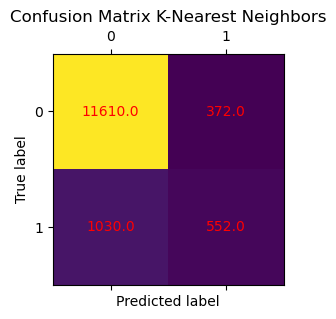

In [38]:
print(f"Accuracy model K-Nearest Neighbors : {acc_knn}")
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(mat_knn)

for (i, j), z in np.ndenumerate(mat_knn):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center', color='red')


plt.title("Confusion Matrix K-Nearest Neighbors")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

## Support Vector Machine

In [39]:
from sklearn import svm

supp_vm = svm.SVC(kernel='linear')
supp_vm.fit(X_train, y_train)
y_pred = supp_vm.predict(X_test)

acc_supp_vm = metrics.accuracy_score(y_test, y_pred)
mat_supp_vm=confusion_matrix(y_test, y_pred)

Accuracy model Support Vector Machine : 0.8919197876732528


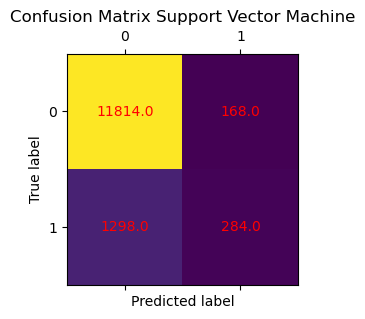

In [40]:
print(f"Accuracy model Support Vector Machine : {acc_supp_vm}")
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(mat_supp_vm)

for (i, j), z in np.ndenumerate(mat_supp_vm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center', color='red')

plt.title("Confusion Matrix Support Vector Machine")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

## Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dec_tree.fit(X_train, y_train)
y_pred = dec_tree.predict(X_test)

acc_dec_tree = metrics.accuracy_score(y_test, y_pred)
mat_dec_tree=confusion_matrix(y_test, y_pred)

Accuracy model Decision Tree : 0.8997345915659097


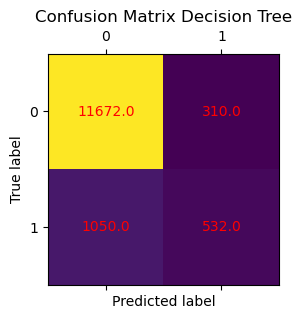

In [42]:
print(f"Accuracy model Decision Tree : {acc_dec_tree}")
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(mat_dec_tree)

for (i, j), z in np.ndenumerate(mat_dec_tree):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center', color='red')

plt.title("Confusion Matrix Decision Tree")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

## Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

ran_for = RandomForestClassifier(n_estimators=100)
ran_for.fit(X_train, y_train)
y_pred = ran_for.predict(X_test)

acc_ran_for = metrics.accuracy_score(y_test, y_pred)
mat_ran_for = confusion_matrix(y_test, y_pred)

Accuracy model Random Forest : 0.9057800058979653


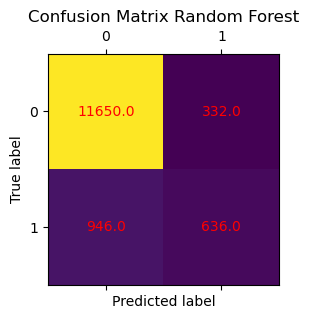

In [44]:
print(f"Accuracy model Random Forest : {acc_ran_for}")
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(mat_ran_for)

for (i, j), z in np.ndenumerate(mat_ran_for):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center', color='red')

plt.title("Confusion Matrix Random Forest")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

## Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB 

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

acc_nb = metrics.accuracy_score(y_test, y_pred)
mat_nb = confusion_matrix(y_test, y_pred)

Accuracy model Naive Bayes : 0.8626511353583014


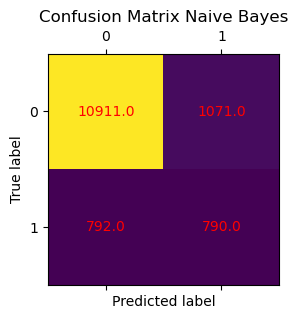

In [46]:
print(f"Accuracy model Naive Bayes : {acc_nb}")
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(mat_nb)

for (i, j), z in np.ndenumerate(mat_nb):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center', color='red')

plt.title("Confusion Matrix Naive Bayes")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

## Kesimpulan

In [54]:
print("Logistic Regression accuracy:", "{:.2%}".format(acc_log_reg))
print("K-Nearest Neigbhor accuracy:", "{:.2%}".format(acc_knn))
print("Support Vector Machine accuracy:", "{:.2%}".format(acc_supp_vm))
print("Decision Tree accuracy:", "{:.2%}".format(acc_dec_tree))
print("Random Forest accuracy:", "{:.2%}".format(acc_ran_for))
print("Naive Bayes accuracy:", "{:.2%}".format(acc_nb))

Logistic Regression accuracy: 90.25%
K-Nearest Neigbhor accuracy: 89.66%
Support Vector Machine accuracy: 89.19%
Decision Tree accuracy: 89.97%
Random Forest accuracy: 90.58%
Naive Bayes accuracy: 86.27%


**Keterangan**<br>
Untuk case ini model yang paling cocok digunakan adalah Random Forest